In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
%matplotlib inline

## Verteilungsfunktion (CDF – Cumulative Distribution Function)
Die Verteilungsfunktion, auch kumulative Verteilungsfunktion (CDF) genannt, gibt die Wahrscheinlichkeit an, dass eine Zufallsvariable 
$X$ einen Wert kleiner oder gleich einem bestimmten Wert $x$ annimmt. Sie beschreibt also die kumulierte Wahrscheinlichkeit bis zu einem bestimmten Punkt.
<br><br>
**Definition**: Für eine Zufallsvariable 
$X$ ist die Verteilungsfunktion $F(x)$ definiert als:<br>
$$F(x)=P(X≤x)$$
Das bedeutet, 
$F(x)$ gibt die Wahrscheinlichkeit an, dass 
$X$ höchstens den Wert 
$x$ annimmt.
<br>
**Eigenschaften**:
- $F(x)$ ist eine nicht abnehmende Funktion.
- $F(x)$ bewegt sich zwischen 0 und 1: $0≤F(x)≤1.$
- $lim_{x→−∞} F(x)=0$ und $lim_{x→∞} F(x)=1$.

**Beispiel**: <br>
Für eine stetige Zufallsvariable, z. B. die Normalverteilung, gibt die Verteilungsfunktion an, wie wahrscheinlich es ist, dass ein zufälliger Wert kleiner oder gleich einem bestimmten Wert ist.
<br><br>
**Visualisierung**:

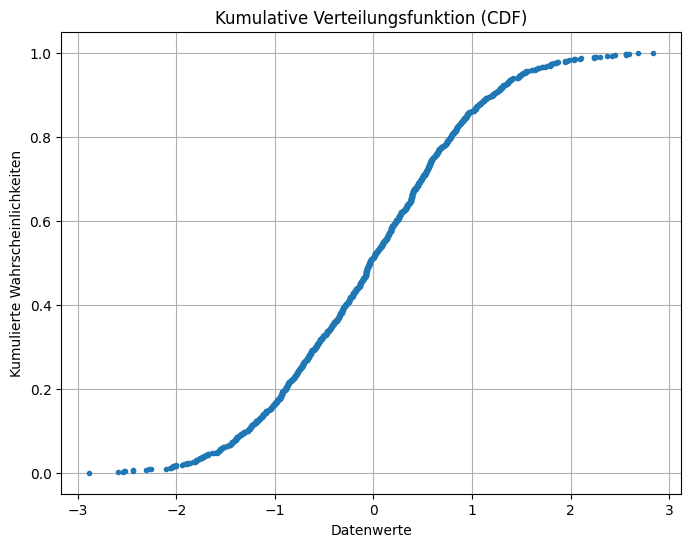

In [3]:
# Zufallsdaten basierend auf einer Normalverteilung
data = np.random.normal(0, 1, 1000)

# Sortieren der Daten
sorted_data = np.sort(data)

# Erstellen der y-Werte für die CDF (Wahrscheinlichkeiten)
y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

plt.figure(figsize=(8, 6))
plt.plot(sorted_data, y_values, marker='.', linestyle='none', label='Empirical CDF')
plt.xlabel('Datenwerte')
plt.ylabel('Kumulierte Wahrscheinlichkeiten')
plt.title('Kumulative Verteilungsfunktion (CDF)')
plt.grid(True);

## Dichtefunktion (PDF – Probability Density Function)
Die Dichtefunktion, auch Wahrscheinlichkeitsdichtefunktion (PDF) genannt, gibt die relative Wahrscheinlichkeit an, dass eine Zufallsvariable $X$ in der Nähe eines bestimmten Werts 
$x$ liegt. Sie wird für **stetige Zufallsvariablen** verwendet.
<br><br>
**Definition**:<br> 
Für eine stetige Zufallsvariable $X$ ist die Dichtefunktion 
$f(x)$ definiert als die Ableitung der Verteilungsfunktion:
$$f(x)= \frac{d}{dx}F(x)$$
Die Dichtefunktion gibt an, wie dicht die Wahrscheinlichkeiten um den Wert 
$x$ herum liegen. Allerdings ist der Wert 
$f(x)$ selbst keine Wahrscheinlichkeit, sondern beschreibt die Wahrscheinlichkeitsdichte.
Die Dichtefunktion$f(x)$ die "Verteilung" oder "Dichte" der Wahrscheinlichkeit über die Werte der Zufallsvariablen 
$X$, aber sie gibt nicht direkt die Wahrscheinlichkeit für einen einzelnen Wert an. Die tatsächliche Wahrscheinlichkeit für ein Intervall wird durch das Integral der Dichtefunktion über dieses Intervall berechnet (Funktion ist stetig und nicht diskret !).<br><br>
In vielen Fällen wird die Dichtefunktion durch eine spezifische mathematische Funktion definiert, die die Eigenschaften einer Dichtefunktion erfüllt.<br> 
Zum Beispiel ist die Normalverteilung wie folgt definiert:
$$  f(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{-1}{2z^2} $$
mit $$z=\frac{(X-\mu)}{\sigma}$$
 
<br><br>
**Eigenschaften**:<br>
- $f(x)≥0$ für alle $x$
- Die Fläche unter der Dichtefunktion ist gleich 1, das heißt: $$\int^{∞}_{-∞} f(x)dx=1$$
- Die Wahrscheinlichkeit, dass $X$ in einem bestimmten Intervall 
$[a,b]$ liegt, ist das Integral der Dichtefunktion über dieses Intervall:
$$P(a≤X≤b)=\int^{b}_{a} f(x)dx$$
 <br><br>
**Beispiel**:<br> 
Die Dichtefunktion der Normalverteilung sieht wie eine Glockenkurve aus und gibt an, wie wahrscheinlich es ist, dass eine Zufallsvariable in der Nähe eines bestimmten Wertes liegt.<br><br>
**Visualisierung**:

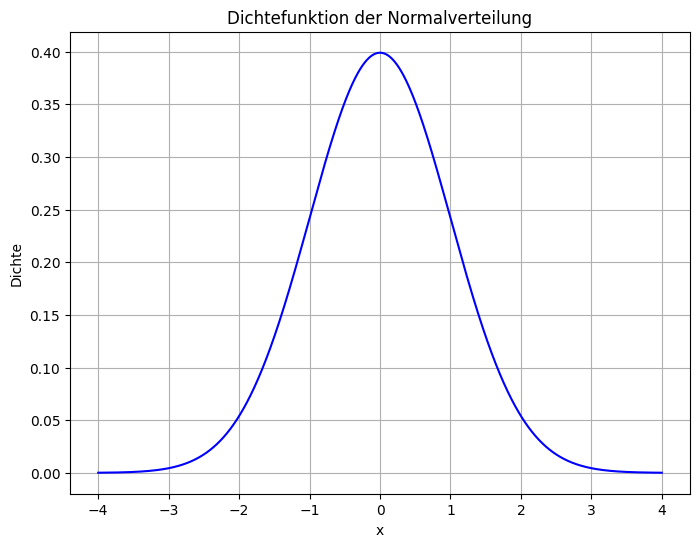

In [4]:
mu = 0  # Mittelwert
sigma = 1  # Standardabweichung

# Werte für die x-Achse
x = np.linspace(-4, 4, 1000)

# Berechnung der Dichtefunktion
pdf = norm.pdf(x, mu, sigma)

# Plot der Dichtefunktion
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, color='blue')
plt.title('Dichtefunktion der Normalverteilung')
plt.xlabel('x')
plt.ylabel('Dichte')
plt.grid(True)

**Bestimmung der Wahrscheinlichkeit**, dass ein zufällig gewählter Wert im Intervall $[a,b]$ mit $a=-1$ und $b=1$ auftritt.

In [ ]:
# Grenzen für das Integral
a = -1  # Untere Grenze
b = 1   # Obere Grenze

# Dichtefunktion als Funktion definieren
def normal_pdf(x):
    return norm.pdf(x, mu, sigma)

# Berechnung des Integrals
integral, error = quad(normal_pdf, a, b)

print(f'Das Integral der Dichtefunktion von {a} nach {b} ist: {integral:.4f},
      \ndies entspricht der Wahrscheinlichkeit das ein zufälliger Wert zwischen a und b auftritt')

Das Integral der Dichtefunktion von -1 nach 1 ist: 0.6827,
dies entspricht der Wahrscheinlichkeit das ein zufälliger Wert zwischen a und b auftritt


**Visualisierung** des Integrals:

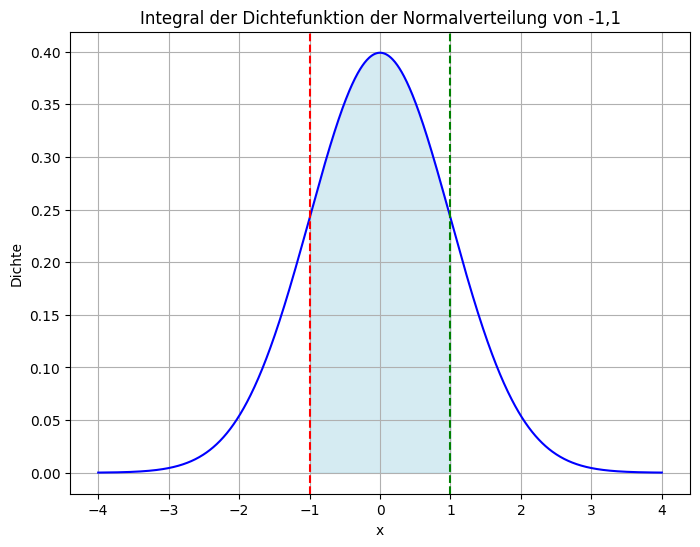

In [6]:
# Grafische Darstellung des Integrals
x = np.linspace(-4, 4, 1000)
pdf = normal_pdf(x)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Dichtefunktion', color='blue')

# Fläche unter der Kurve zwischen a und b
x_fill = np.linspace(a, b, 100)
y_fill = normal_pdf(x_fill)
plt.fill_between(x_fill, y_fill, color='lightblue', alpha=0.5)

plt.title('Integral der Dichtefunktion der Normalverteilung von -1,1')
plt.xlabel('x')
plt.ylabel('Dichte')
plt.axvline(a, color='red', linestyle='--')
plt.axvline(b, color='green', linestyle='--')
plt.grid(True)

### Beziehung zwischen Verteilungs- und Dichtefunktion:
- Die Verteilungsfunktion kann aus der Dichtefunktion durch Integration gewonnen werden.
- Umgekehrt kann die Dichtefunktion aus der Verteilungsfunktion durch Differentiation erlangt werden.